In [28]:
%load_ext autoreload
%autoreload
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [29]:
import tensorflow as tf
import tensorflow.keras as keras
from model_tools import load_dataset, load_valset
import time

In [30]:

import matplotlib.pyplot as plt

In [31]:
Model_Name = 'full_conv4_0'

In [32]:
trained_model = keras.models.load_model('saved_model/'+Model_Name)

In [33]:
val_ds = load_valset('val_image',10)
test_ds = load_dataset('test_image',10)

In [34]:
img_batch, mask_batch = list(val_ds.take(1).as_numpy_iterator())[0]
print(img_batch.shape)
print(mask_batch.shape)

(32, 200, 200, 3)
(32, 100, 100)


In [35]:
st = time.time()
predict_batch = trained_model(img_batch)
print('took:{}'.format(time.time()-st))

took:1.5011425018310547


In [36]:
print(predict_batch.shape)

(32, 100, 100)


In [37]:
import numpy as np

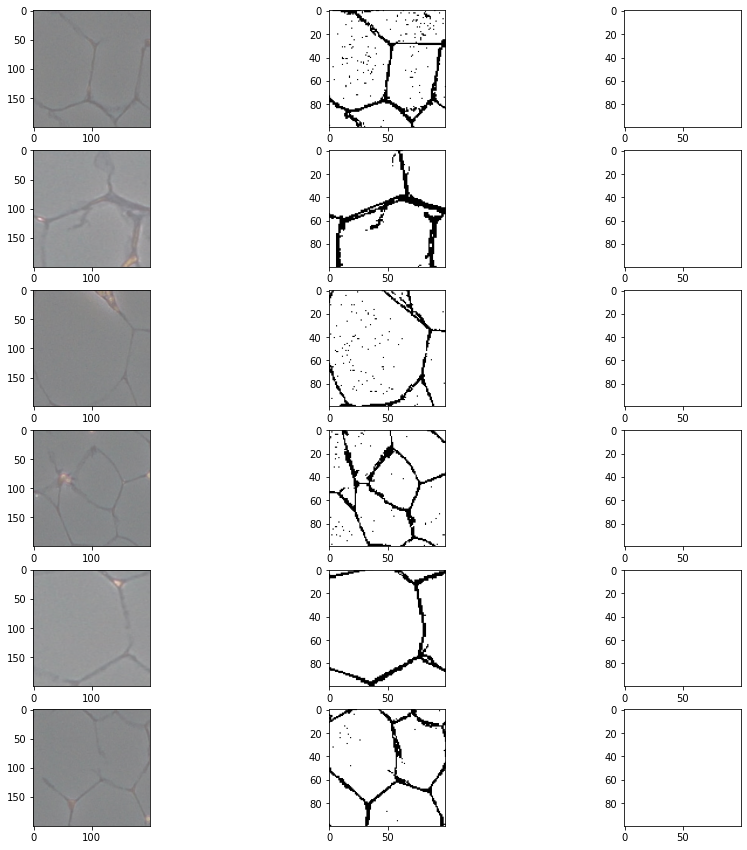

In [38]:
fig = plt.figure(figsize=(15,15))
i = 1
n = 6
for img, mask, pred in zip(img_batch[:n],mask_batch[:n],predict_batch[:n]):
    ax = fig.add_subplot(n,3,i)
    ax.imshow(img)
    ax = fig.add_subplot(n,3,i+1)
    ax.imshow(mask, cmap='binary')
    ax = fig.add_subplot(n,3,i+2)
    ax.imshow(pred, cmap='binary')
    i += 3
plt.show()

In [39]:
print(predict_batch[0][0])
print(np.min(predict_batch[0]))
print(np.max(predict_batch[0]))

tf.Tensor(
[0.14199379 0.14199379 0.14199379 0.14199379 0.14199379 0.14199379
 0.14199379 0.14199379 0.14199379 0.14199379 0.14199379 0.14199379
 0.14199379 0.14199379 0.14199379 0.14199379 0.14199379 0.14199379
 0.14199379 0.14199379 0.14199379 0.14199379 0.14199379 0.14199379
 0.14199379 0.14199379 0.14199379 0.14199379 0.14199379 0.14199379
 0.14199379 0.14199379 0.14199379 0.14199379 0.14199379 0.14199379
 0.14199379 0.14199379 0.14199379 0.14199379 0.14199379 0.14199379
 0.14199379 0.14199379 0.14199379 0.14199379 0.14199379 0.14199379
 0.14199379 0.14199379 0.14199379 0.14199379 0.14199379 0.14199379
 0.14199379 0.14199379 0.14199379 0.14199379 0.14199379 0.14199379
 0.14199379 0.14199379 0.14199379 0.14199379 0.14199379 0.14199379
 0.14199379 0.14199379 0.14199379 0.14199379 0.14199379 0.14199379
 0.14199379 0.14199379 0.14199379 0.14199379 0.14199379 0.14199379
 0.14199379 0.14199379 0.14199379 0.14199379 0.14199379 0.14199379
 0.14199379 0.14199379 0.14199379 0.14199379 0.1419

In [40]:
print(img_batch[0][0])
print(np.min(img_batch[0]))
print(np.max(img_batch[0]))

[[0.5058824  0.52156866 0.5294118 ]
 [0.50980395 0.5254902  0.5294118 ]
 [0.5176471  0.53333336 0.5372549 ]
 [0.52156866 0.5372549  0.5372549 ]
 [0.5137255  0.5294118  0.53333336]
 [0.5058824  0.52156866 0.5254902 ]
 [0.49019608 0.5058824  0.5176471 ]
 [0.49411765 0.50980395 0.5254902 ]
 [0.5019608  0.5176471  0.5294118 ]
 [0.5058824  0.5176471  0.5294118 ]
 [0.49803922 0.50980395 0.52156866]
 [0.49019608 0.5019608  0.5137255 ]
 [0.49411765 0.49411765 0.50980395]
 [0.49411765 0.49411765 0.5019608 ]
 [0.4862745  0.4862745  0.49411765]
 [0.49019608 0.49019608 0.49803922]
 [0.48235294 0.47843137 0.4862745 ]
 [0.4745098  0.47058824 0.48235294]
 [0.4862745  0.47843137 0.49019608]
 [0.47843137 0.47058824 0.48235294]
 [0.47843137 0.47058824 0.47843137]
 [0.47843137 0.47058824 0.48235294]
 [0.4745098  0.46666667 0.48235294]
 [0.4745098  0.46666667 0.4862745 ]
 [0.47843137 0.47058824 0.49411765]
 [0.48235294 0.47843137 0.49411765]
 [0.4862745  0.4862745  0.49411765]
 [0.49019608 0.49019608 0.49